<a href="https://colab.research.google.com/github/haisukma/CapstoneProject/blob/Sentral/Sentimen_Analisis_pada_Aplikasi_By_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper

from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import top_k_accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Scrapping Dataset

In [2]:
from google_play_scraper import app, reviews_all, Sort

scrapview = reviews_all(
    'com.byu.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000
)

In [3]:
import csv

with open('ulasan_aplikasi_byu.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapview:
        writer.writerow([review['content']])

In [4]:
app_reviews_df = pd.DataFrame(scrapview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi_byu.csv', index=False)

app_reviews_df = pd.DataFrame(scrapview)

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,943820dc-c94d-4b19-ae32-22feae5236bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya pengguna setia Axis, kelebihan dari byU i...",2,23,1.58.0,2024-11-07 15:43:44,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-11-07 16:59:10,1.58.0
1,3958977d-16f2-4379-97f1-dcca24f14cd0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keunggulan by. U tanpa masa aktif dan internet...,1,22,1.58.0,2024-11-07 14:59:09,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-11-07 15:38:12,1.58.0
2,284567cf-f89c-4102-9d6b-f887d9176315,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini sisa data masih 5 Gb lebih, tapi jaringan ...",2,26,1.58.0,2024-10-31 12:43:59,Hi Kak Riska. Maafin bikin Kakak ngga nyaman. ...,2024-10-31 22:49:42,1.58.0
3,b9443a36-e641-4eaf-8139-50089b6303fb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk harga paket data sangat ramah dan irit d...,3,2,1.58.0,2024-11-01 19:35:42,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-11-02 15:18:33,1.58.0
4,a8adf854-98fe-4668-bf52-54327fd9316a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sorry di kasih bintang 1 , Nindy, kayaknya apl...",1,77,1.58.0,2024-10-29 17:11:21,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2024-10-29 20:42:03,1.58.0


In [6]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153243 entries, 0 to 153242
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              153243 non-null  object        
 1   userName              153243 non-null  object        
 2   userImage             153243 non-null  object        
 3   content               153242 non-null  object        
 4   score                 153243 non-null  int64         
 5   thumbsUpCount         153243 non-null  int64         
 6   reviewCreatedVersion  128865 non-null  object        
 7   at                    153243 non-null  datetime64[ns]
 8   replyContent          135024 non-null  object        
 9   repliedAt             135024 non-null  datetime64[ns]
 10  appVersion            128865 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 12.9+ MB


In [7]:
clean_df = app_reviews_df.dropna()

In [8]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113076 entries, 0 to 146597
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              113076 non-null  object        
 1   userName              113076 non-null  object        
 2   userImage             113076 non-null  object        
 3   content               113076 non-null  object        
 4   score                 113076 non-null  int64         
 5   thumbsUpCount         113076 non-null  int64         
 6   reviewCreatedVersion  113076 non-null  object        
 7   at                    113076 non-null  datetime64[ns]
 8   replyContent          113076 non-null  object        
 9   repliedAt             113076 non-null  datetime64[ns]
 10  appVersion            113076 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.4+ MB


Prepocessing Text
1. CleaningText
2. CaseFoldingText
3. TokenizingText
4. Filtering Text
5. StemmingText
6. toSentence

In [14]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #menghapus mention
  text = re.sub(r'#[A-Za-z0-9]+', '', text) #menghapus mention
  text = re.sub(r'RT[\s]+', '', text) #menghapus RT
  text = re.sub(r'https?:\/\/\S+', '', text) #menghapus link
  text = re.sub(r'[0-9]+', '', text) #menghapus angka
  text = re.sub(r'[^\w\s]', '', text) #menghapus karakter selain huruf dan angka
  text = text.replace('\n', ' ') #mengganti baris baru dengan spasi
  text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus tanda baca
  text = text.strip() #menghapus spasi di awal dan akhir kalimat
  return text

def casefoldingText(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku',"di", "ga", "ya", "gaa", "loh", "kah", "woi", "woii", "woy"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = [filtered]
  return filtered

  def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [15]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
  words = text.split()
  fixed_words = []

  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)

  fixed_text = ' '.join(fixed_words)
  return fixed_text

In [16]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [17]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [18]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]

  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]

  polarity=''

  if (score >= 0):
    polarity='positive'
  elif (score < 0):
    polarity='negative'

  return score, polarity

In [19]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    66049
negative    47027
Name: count, dtype: int64


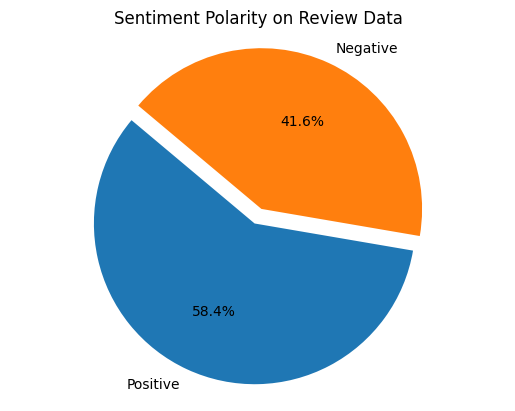

In [20]:
import matplotlib.pyplot as plt

positive_count = 66049
negative_count = 47027

# Calculate percentages
total_count = positive_count + negative_count
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
ax.axis('equal')

# Customize the plot (optional)
plt.title('Sentiment Polarity on Review Data')
plt.show()

In [22]:
!pip install scikit-learn
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7813287640946275
Naive Bayes - accuracy_test: 0.7785638486027591
